In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# load the data

In [2]:
# import relative to notebook location
data = pd.read_csv("../data/BitcoinHeistData.csv")
data["ransomware"] = (data["label"] != "white").astype(int)
data.head()

,address,year,day,length,weight,count,looped,neighbors,income,label,ransomware
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber,1
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky,1
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber,1
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber,1
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky,1


# length

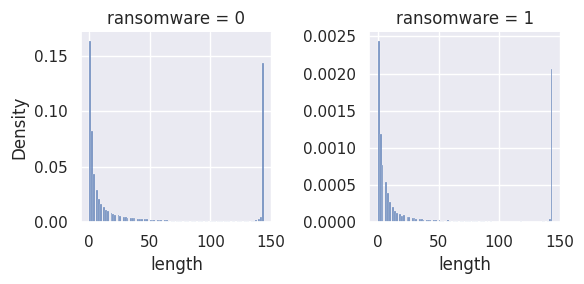

In [3]:
sns.set_theme(style="darkgrid")
sns.displot(
    data, 
    x="length", 
    col="ransomware", 
    #col_wrap=5,
    #row="label",
    #binwidth=3, 
    height=3, 
    facet_kws=dict(margin_titles=True, sharey=False),
    stat="density"
)

# weight

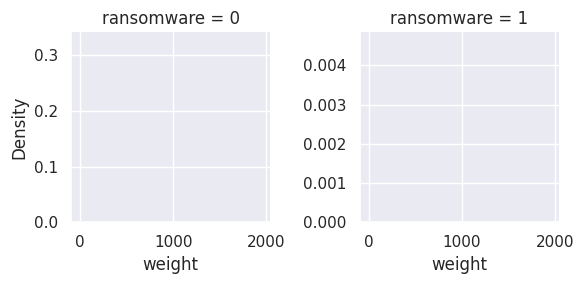

In [4]:
sns.set_theme(style="darkgrid")
sns.displot(
    data, 
    x="weight", 
    col="ransomware", 
    #col_wrap=5,
    #row="label",
    binwidth=3, 
    height=3, 
    facet_kws=dict(margin_titles=True, sharey=False),
    stat="density"
)

# count

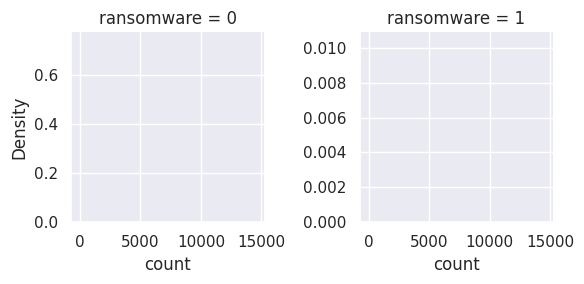

In [5]:
sns.displot(
    data, 
    x="count", 
    col="ransomware", 
    #col_wrap=5,
    #row="label",
    #binwidth=3, 
    height=3, 
    facet_kws=dict(margin_titles=True, sharey=False),
    stat="density"
)

# looped

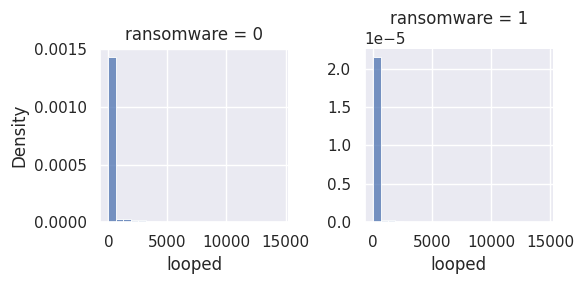

In [6]:
sns.displot(
    data, 
    x="looped", 
    col="ransomware", 
    #col_wrap=5,
    #row="label",
    #binwidth=3, 
    height=3, 
    facet_kws=dict(margin_titles=True, sharey=False),
    stat="density"
)

# neighbors

In [ ]:
sns.displot(
    data, 
    x="neighbors", 
    col="ransomware", 
    #col_wrap=5,
    #row="label",
    #binwidth=3, 
    height=3, 
    facet_kws=dict(margin_titles=True, sharey=False),
    stat="density"
)

# other features

In [4]:
unique_address = set(data.address)
unique_label = sorted(set(data.label))
print("data shape: ", data.shape)
print("number of white labels", sum(data.label == "white"))
print("number of non white labels", sum(data.label != "white"))
print("number of unique address: ", len(unique_address))
print("number of unique label: ", len(unique_label))

print(sorted(unique_label))

data shape:  (2916697, 11)
number of white labels 2875284
number of non white labels 41413
number of unique address:  2631095
number of unique label:  29
['montrealAPT', 'montrealComradeCircle', 'montrealCryptConsole', 'montrealCryptXXX', 'montrealCryptoLocker', 'montrealCryptoTorLocker2015', 'montrealDMALocker', 'montrealDMALockerv3', 'montrealEDA2', 'montrealFlyper', 'montrealGlobe', 'montrealGlobeImposter', 'montrealGlobev3', 'montrealJigSaw', 'montrealNoobCrypt', 'montrealRazy', 'montrealSam', 'montrealSamSam', 'montrealVenusLocker', 'montrealWannaCry', 'montrealXLocker', 'montrealXLockerv5.0', 'montrealXTPLocker', 'paduaCryptoWall', 'paduaJigsaw', 'paduaKeRanger', 'princetonCerber', 'princetonLocky', 'white']


# count the daily number of appearences by label

In [5]:
df_daily_count = data.groupby(by=["label", "year", "day"]).count()['count'].reset_index()
df_daily_count['date'] = pd.to_datetime(
    df_daily_count['year'].astype(str) + "-" + df_daily_count['day'].astype(str), 
    format="%Y-%j"
)

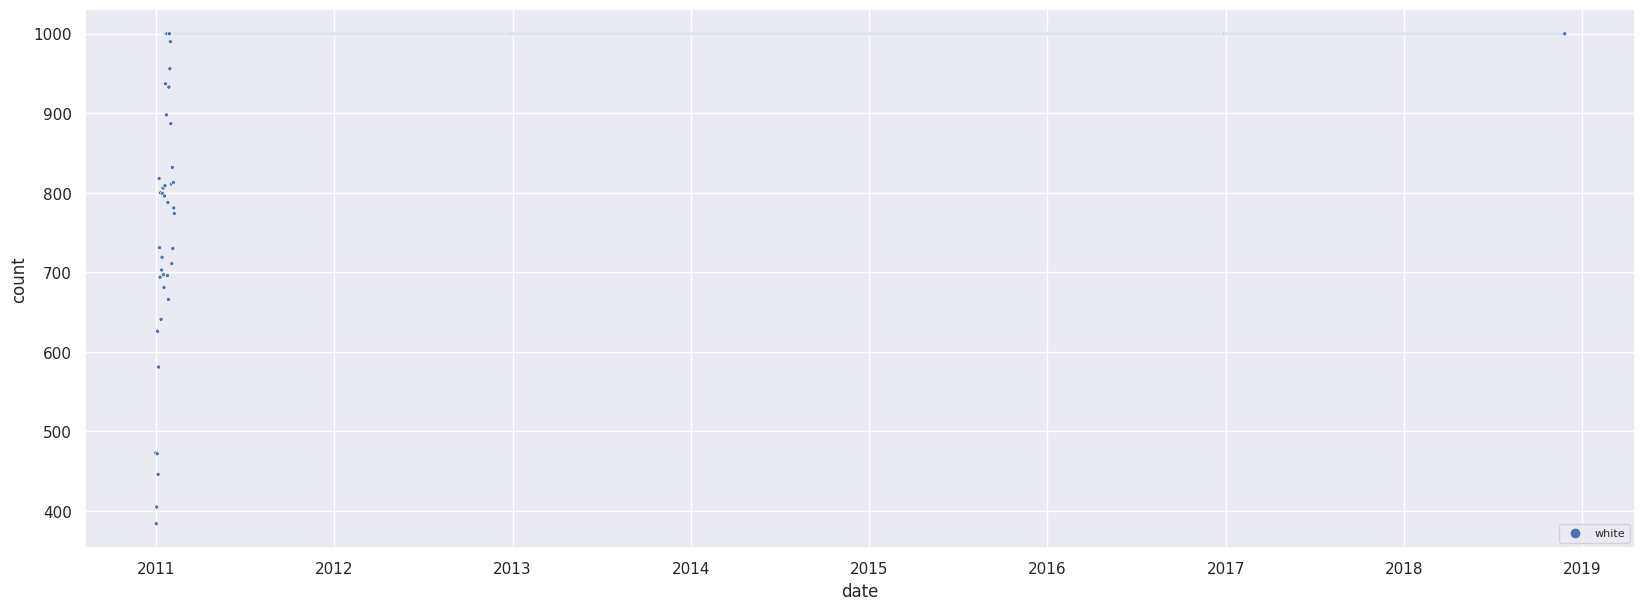

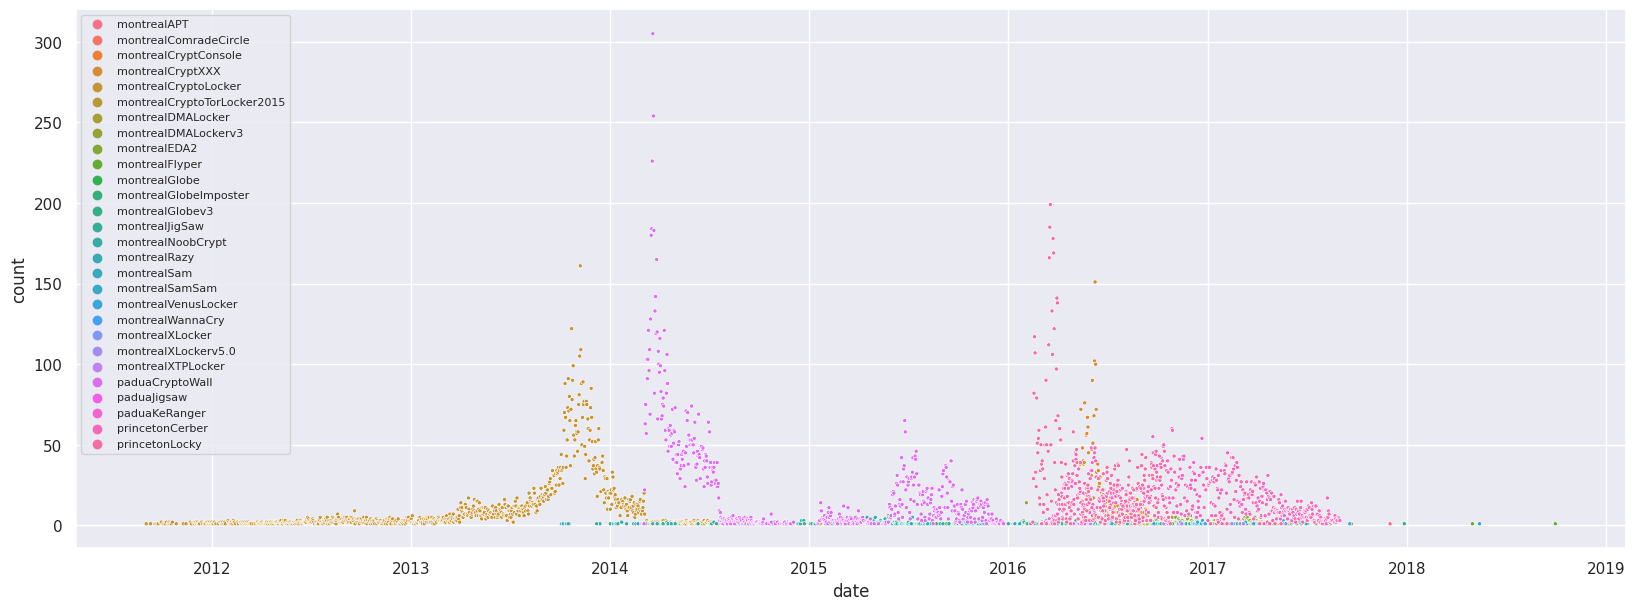

In [8]:
fig,ax = plt.subplots(figsize=(20,7))
sns.scatterplot(
    x='date', 
    y='count', 
    data=df_daily_count[df_daily_count['label'] == "white"], 
    hue='label',
    marker='.',
    ax=ax
)
plt.legend(
    fontsize=8,
    loc="lower right"
)
fig.savefig(
    fname="../pdf/white_count_per_day.pdf"
)

fig,ax = plt.subplots(figsize=(20,7))
sns.scatterplot(
    x='date', 
    y='count', 
    data=df_daily_count[df_daily_count['label'] != "white"], 
    hue='label',
    marker='.',
    ax=ax
)
plt.legend(
    fontsize=8,
    loc="upper left"
)
fig.savefig(
    fname="../pdf/ransomware_count_per_day.pdf"
)


# Number of appearences of each ransomware label

In [9]:
data.groupby(by=["label"]).count()['count'].sort_values()

label
montrealComradeCircle                1
montrealSam                          1
montrealXLocker                      1
paduaJigsaw                          2
montrealJigSaw                       4
montrealEDA2                         6
montrealXLockerv5.0                  7
montrealCryptConsole                 7
montrealVenusLocker                  7
montrealXTPLocker                    8
montrealFlyper                       9
paduaKeRanger                       10
montrealAPT                         11
montrealRazy                        13
montrealWannaCry                    28
montrealGlobe                       32
montrealGlobev3                     34
montrealGlobeImposter               55
montrealCryptoTorLocker2015         55
montrealSamSam                      62
montrealDMALocker                  251
montrealDMALockerv3                354
montrealNoobCrypt                  483
montrealCryptXXX                  2419
princetonLocky                    6625
princetonCerber    